In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.interpolate import interp1d, LinearNDInterpolator
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor

In [4]:
# I would like to simulate some data
x = np.arange(-2,6,0.05)
y = np.sin(x**2)

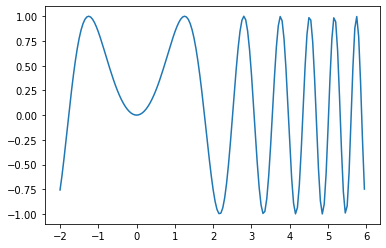

In [5]:
plt.plot(x,y)

In [6]:
# add noise to the output
ynoised = y + np.random.normal(loc=0,scale=1.5,size=len(y)) 

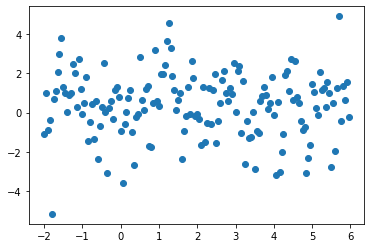

In [7]:
plt.scatter(x,ynoised)

In [8]:
model = RandomForestRegressor(n_estimators=120,max_depth=3)

In [18]:
xtrain, xtest, ytrain, ytest =tts(x.reshape(-1,1),ynoised,test_size=0.25,random_state=1234)

In [19]:
# fit the model
model.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=3, n_estimators=120)

In [22]:
yhat = model.predict(xtest)

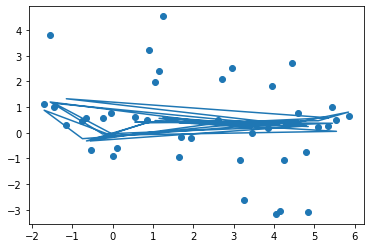

In [23]:
plt.scatter(xtest,ytest)
plt.plot(xtest,yhat)

In [24]:
M = np.column_stack([xtest,yhat])

In [27]:
M = M[np.argsort(M[:,0])]

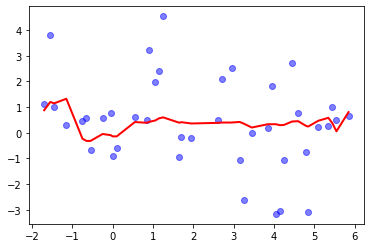

In [28]:
plt.scatter(xtest,ytest,color='blue',alpha=0.5)
plt.plot(M[:,0],M[:,1],color='red',lw=2)

## A Multivariate Regressor with Lo(w)ess

$$\large Y = X\beta $$

We solve a problem like:

$$\large W_i\cdot Y = W_i\cdot X\cdot\beta$$ 

we are going to make $W_i$ diagonal matrices.

In [31]:
# we define some kernels
def tricubic(dx):
  if len(dx.shape) == 1:
    dx = dx.reshape(-1,1)
  d = np.sqrt(np.sum(dx**2, axis=1))
  return np.where(d>1,0,70/81*(1-d**3)**3)

In [34]:
def lowess_model(x,y,xnew,kern,tau,intercept):
  n = len(y)
  #if intercept:
   # x1 = np.column_stack(np.ones(len(n)),x)
  #else:
   # x1 = x
  yest = np.zeros(len(y))
  for i in range(n):
    weights = kern(x-x[i])
    W = np.diag(weights)
    b = W.dot(y)
    A = W.dot(x)
    beta, res, rnk, s = linalg.lstq(A,b)
    yest[i] = np.dot(xnew,beta)
  f = LinearNDInterpolator(X, yest)
  return f(xnew)

The function above needs more work (you will see why when you apply it).